In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

In [3]:
# Load and preview the dataset
# Update the file path to match your dataset location
file_path = '../DBtrainrides_complete_preprocessed_2.csv'
train_ride_df = pd.read_csv(file_path)

# Display the first few rows of the dataset
train_ride_df.head()

,ID_Base,ID_Timestamp,stop_number,IBNR,long,lat,arrival_plan,departure_plan,arrival_delay_m,transformed_info_message,prev_arrival_delay_m,prev_departure_delay_m,weighted_avg_prev_delay,max_station_number,station_progress,info_label_encoded,arrival_normalized,departure_normalized
0,-1001326572688500578,2407082041,2,8011118.0,13.375988,52.509379,2024-07-08 20:44:00,2024-07-08 20:45:00,0.0,No message,0.0,0.0,0.000000,7,0.285714,0,0.125866,0.125965
1,-1001326572688500578,2407082041,3,8011160.0,9.095851,48.849792,2024-07-08 20:50:00,2024-07-08 20:50:00,0.0,No message,0.0,0.0,0.000000,7,0.428571,0,0.126460,0.126460
2,-1001326572688500578,2407082041,4,8011167.0,13.299437,52.530276,2024-07-08 20:55:00,2024-07-08 20:56:00,0.0,No message,0.0,0.0,0.000000,7,0.571429,0,0.126954,0.127053
3,-1001326572688500578,2407082041,5,8010404.0,13.196898,52.534648,2024-07-08 21:00:00,2024-07-08 21:03:00,2.0,No message,0.0,0.0,0.000000,7,0.714286,0,0.127449,0.127746
4,-1001326572688500578,2407082041,6,8080040.0,13.128917,52.549396,2024-07-08 21:06:00,2024-07-08 21:07:00,1.0,No message,2.0,0.0,0.666667,7,0.857143,0,0.128043,0.128142


In [4]:
# Handle missing values and prepare features and target
# Fill missing values with 0 as a default strategy
# train_ride_df.fillna(0, inplace=True)

# Define features and target variable
features = [
    'stop_number', 'IBNR', 'long', 'lat', 
    'prev_arrival_delay_m', 'prev_departure_delay_m', 
    'weighted_avg_prev_delay', 'max_station_number', 'station_progress',
    'info_label_encoded', 'arrival_normalized', 'departure_normalized', 'transformed_info_message', 'arrival_plan', 'departure_plan'
]
target = 'arrival_delay_m'

In [5]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('../utils')))  # Add the parent directory to the path

from utils import custom_train_test_split

In [6]:
X_train, y_train, X_test, y_test = custom_train_test_split(train_ride_df, "arrival_delay_m", 0.8)

In [7]:
# # Standardise the features
# # StandardScaler ensures features are scaled appropriately for Lasso
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_train)

In [8]:
# Display the feature matrix and target to verify
X_train.head()

,ID_Base,ID_Timestamp,stop_number,IBNR,long,lat,prev_arrival_delay_m,prev_departure_delay_m,weighted_avg_prev_delay,max_station_number,station_progress,info_label_encoded,arrival_normalized,departure_normalized
0,-1001326572688500578,2407082041,2,8011118.0,13.375988,52.509379,0.0,0.0,0.000000,7,0.285714,0,0.125866,0.125965
1,-1001326572688500578,2407082041,3,8011160.0,9.095851,48.849792,0.0,0.0,0.000000,7,0.428571,0,0.126460,0.126460
2,-1001326572688500578,2407082041,4,8011167.0,13.299437,52.530276,0.0,0.0,0.000000,7,0.571429,0,0.126954,0.127053
3,-1001326572688500578,2407082041,5,8010404.0,13.196898,52.534648,0.0,0.0,0.000000,7,0.714286,0,0.127449,0.127746
4,-1001326572688500578,2407082041,6,8080040.0,13.128917,52.549396,2.0,0.0,0.666667,7,0.857143,0,0.128043,0.128142


In [9]:
y_train.head()

0    0.0
1    0.0
2    0.0
3    2.0
4    1.0
Name: arrival_delay_m, dtype: float64

In [10]:
# Hyperparameter tuning with GridSearchCV
# Define the Lasso regression model
lasso = Lasso()

# Define the parameter grid for alpha (regularisation strength)
param_grid = {'alpha': np.logspace(-4, 0, 10)}  # Testing alphas from 0.0001 to 1

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Display the best alpha and best score
best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_

print(f"Best Alpha: {best_alpha}")
print(f"Best Cross-Validation R-squared Score: {best_score}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/tu2/anaconda3/envs/data_mining/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.325e+06, tolerance: 1.230e+03
  model = cd_fast.enet_coordinate_descent(
/home/tu2/anaconda3/envs/data_mining/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.372e+06, tolerance: 1.245e+03
  model = cd_fast.enet_coordinate_descent(
/home/tu2/anaconda3/envs/data_mining/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

Best Alpha: 0.0001
Best Cross-Validation R-squared Score: 0.6200312178939729


In [11]:
# Evaluate the tuned Lasso model on the test set
# Use the best model from GridSearchCV
best_lasso = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_lasso.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score on Test Set: {r2}")

Mean Squared Error: 4.2406050490604805
R-squared Score on Test Set: 0.5930902607224652


In [13]:
# Analyse feature importance
# Display coefficients for each feature from the best model
features = X_train.columns
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': best_lasso.coef_})
print("Feature Importance (Lasso):")
coefficients

Feature Importance (Lasso):


,Feature,Coefficient
0,ID_Base,8.977971e-23
1,ID_Timestamp,8.084173e-07
2,stop_number,-8.940636e-03
3,IBNR,1.017358e-08
4,long,-5.703428e-03
5,lat,-3.869191e-02
6,prev_arrival_delay_m,-1.794580e-01
7,prev_departure_delay_m,7.061064e-01
8,weighted_avg_prev_delay,5.380550e-01
9,max_station_number,1.281176e-03


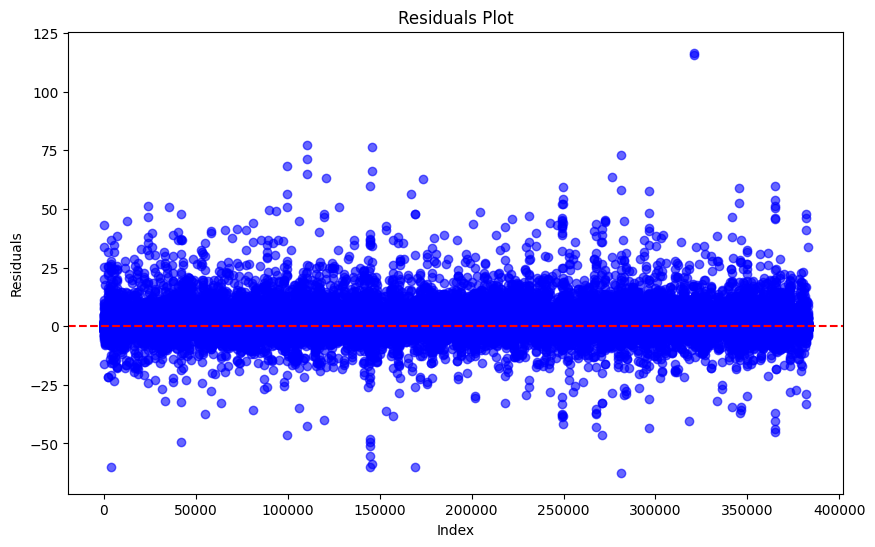

In [14]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals)), residuals, c='b', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

In [ ]:
# Validate using k-fold cross-validation on the entire dataset
# Perform k-fold cross-validation using the tuned model
cv_scores = cross_val_score(best_lasso, X_train, y_train, cv=10, scoring='r2')

# Print cross-validation results
print(f"Cross-Validation R-squared Scores: {cv_scores}")
print(f"Mean R-squared Score: {np.mean(cv_scores)}")
print(f"Standard Deviation of R-squared Scores: {np.std(cv_scores)}")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example: Define Germany's geographic boundaries (approximate)
germany_bounds = {
    'min_lat': 47.0, 'max_lat': 55.0,  # Latitude range
    'min_lon': 5.0, 'max_lon': 15.0    # Longitude range
}

# Create a grid over Germany
def create_grid(bounds, cell_size):
    lat_edges = np.arange(bounds['min_lat'], bounds['max_lat'], cell_size)
    lon_edges = np.arange(bounds['min_lon'], bounds['max_lon'], cell_size)
    return lat_edges, lon_edges

# Define cell size (in degrees)
cell_size = 0.25  # Adjust for desired resolution (smaller = finer grid)

lat_edges, lon_edges = create_grid(germany_bounds, cell_size)

# Assign test data points to grid cells
# Assuming X_test has 'latitude' and 'longitude' columns
X_test['lat_bin'] = pd.cut(X_test['lat'], bins=lat_edges)
X_test['lon_bin'] = pd.cut(X_test['long'], bins=lon_edges)

# Combine with y_test and y_pred
data = pd.DataFrame({
    'lat_bin': X_test['lat_bin'],
    'lon_bin': X_test['lon_bin'],
    'y_test': y_test,
    'y_pred': y_pred
})

# Compute squared error
data['squared_error'] = (data['y_test'] - data['y_pred'])**2

# Group by grid cells and compute MSE
spatial_mse = data.groupby(['lat_bin', 'lon_bin'])['squared_error'].mean().reset_index()
spatial_mse.rename(columns={'squared_error': 'spatial_mse'}, inplace=True)

# Add grid cell centers for visualization
spatial_mse['lat_center'] = spatial_mse['lat_bin'].apply(lambda x: x.mid)
spatial_mse['lon_center'] = spatial_mse['lon_bin'].apply(lambda x: x.mid)

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(spatial_mse['lon_center'], spatial_mse['lat_center'], c=spatial_mse['spatial_mse'], cmap='viridis', s=50)
plt.colorbar(label='Spatial MSE')
plt.title('Spatial MSE Across Germany')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()